# WCA - Análisis Día de la Mujer


In [19]:
# Imports

from pathlib import Path

import pandas as pd
from sqlalchemy import create_engine

In [20]:
## Database

user = "user"
password = "pass"
host = "127.0.0.1"
port = 3306
database = "wca_db"

conn_str = f"mariadb+mariadbconnector://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(conn_str)

## Reportes


In [21]:
# Global Variables

REPORT = "women"

In [22]:
def process_report(name: str, query: str) -> pd.DataFrame:
    df = pd.read_sql_query(query, engine)

    dst_file = Path(f"output/{REPORT}/{name}.csv")
    dst_file.parent.mkdir(parents=True, exist_ok=True)

    df.to_csv(dst_file, sep=";", index=False)
    print("Results saved in", dst_file)

    return df

### 1. Top de mujeres con más podios en Colombia


In [23]:
df = process_report(
    "1 - Top de mujeres con más podios en Colombia",
    """
        select r.personName nombre, count(*) conteo
        from Results r
        join Persons p on p.id = r.personId
        where 1=1
        and r.personCountryId = 'Colombia'
        and r.roundTypeId in ('f', 'b', 'c')
        and r.pos in ('1', '2', '3')
        and p.gender = 'f'
        group by 1
        order by 2 desc
        limit 50
    """,
)
df.head(10)

Results saved in output/women/1 - Top de mujeres con más podios en Colombia.csv


,nombre,conteo
0,Isabela Quesada Rodríguez,35
1,Juliana Gonzalez Silva,12
2,Ginneidy Camila León Zabala,11
3,Victoria Alejandra Zambrano Buitrago,5
4,Daniela Lobo Jaimes,4
5,Natalia Andrea Cruz Ochoa,3
6,Laura Paola Gamboa Guzman,3
7,Catalina Herrera López,2
8,Raquel Mendivelso,2
9,Carolina Salazar,1


### 2. Top de mujeres con más oros en Colombia


In [24]:
df = process_report(
    "2 - Top de mujeres con más oros en Colombia",
    """
        with data as (
            select r.personId, r.personName nombre, count(*) conteo
            from Results r
            join Competitions c on r.competitionId = c.id
            where 1=1
            and r.personCountryId = 'Colombia'
            and r.roundTypeId in ('f', 'b', 'c')
            and r.pos = '1'
            group by 1
        )
        select d.nombre, d.conteo
        from data d
        join Persons p on p.id = d.personId
        where p.gender = 'f'
        order by 2 desc, 1
        limit 50
    """,
)
df.head(10)

Results saved in output/women/2 - Top de mujeres con más oros en Colombia.csv


,nombre,conteo
0,Isabela Quesada Rodríguez,7
1,Ginneidy Camila León Zabala,2
2,Laura Paola Gamboa Guzman,2
3,Daniela Lobo Jaimes,1
4,Juliana Gonzalez Silva,1
5,Mariana Jimenez Torres,1
6,Raquel Mendivelso,1


### 3. Top de mujeres con más competencias en Colombia


In [25]:
df = process_report(
    "3 - Top de mujeres con más competencias en Colombia",
    """
        with data as (
            select r.personId, r.personName nombre, count(distinct r.competitionId) conteo
            from Results r
            join Competitions c on r.competitionId = c.id
            where 1=1
            and r.personCountryId = 'Colombia'
            group by 1
        )
        select d.nombre, d.conteo
        from data d
        join Persons p on p.id = d.personId
        where p.gender = 'f'
        order by 2 desc, 1
        limit 50
    """,
)
df.head(10)

Results saved in output/women/3 - Top de mujeres con más competencias en Colombia.csv


,nombre,conteo
0,Catalina Herrera López,176
1,Francia Perez,108
2,Alisson Gonzalez,46
3,Natalia Mendoza,42
4,Luna Gaitán,39
5,Victoria Alejandra Zambrano Buitrago,36
6,Isabela Quesada Rodríguez,33
7,Juliana Gonzalez Silva,33
8,Lizeth Stefania Herrera Rodriguez,25
9,Valentina Sánchez Muñoz,25


### 4. Top de mujeres con más ciudades visitadas en Colombia


In [26]:
df = process_report(
    "4 - Top de mujeres con más ciudades visitadas en Colombia",
    """
        with cities as (
            select distinct
                r.personId,
                r.personName,
                c.cityName,
                case
                    when c.cityName in ('Bogotá', 'Bogotá D.C.', 'Bogotá, Cundinamarca') then 'Bogotá, Cundinamarca'
                    when c.cityName in ('Quimbaya') then 'Quimbaya, Quindío'
                    when c.cityName in ('Bucaramanga') then 'Bucaramanga, Santander'
                    when c.cityName in ('Mosquera') then 'Mosquera, Cundinamarca'
                    when c.cityName in ('Tunja') then 'Tunja, Boyacá'
                    when c.cityName in ('San Gil') then 'San Gil, Santander'
                    when c.cityName in ('Pereira') then 'Pereira, Risaralda'
                    when c.cityName in ('Neiva') then 'Neiva, Huila'
                    when c.cityName in ('Melgar') then 'Melgar, Tolima'
                    when c.cityName in ('Medellín - Antioquia', 'Medellin') then 'Medellín, Antioquia'
                    when c.cityName in ('La Estrella') then 'La Estrella, Antioquia'
                    when c.cityName in ('Floridablanca') then 'Floridablanca, Santander'
                    when c.cityName in ('El Carmen De Viboral') then 'El Carmen de Viboral, Antioquia'
                    when c.cityName in ('Cartagena') then 'Cartagena, Bolivar'
                    when c.cityName in ('Villavicencio') then 'Villavicencio, Meta'
                    when c.cityName in ('Florencia') then 'Florencia, Caquetá'
                    when c.cityName in ('Barrancabermeja') then 'Barrancabermeja, Santander'
                    when c.cityName in ('Cartago') then 'Cartago, Valle del Cauca'
                    when c.cityName in ('Chocontá') then 'Chocontá, Cundinamarca'
                    when c.cityName in ('La Sierra, Quipile, Cundinamarca') then 'La Sierra, Cundinamarca'
                    else replace(c.cityName, '.', '')
                end as normalized_city
            from Results r
            join Competitions c on r.competitionId = c.id
            where 1=1
            and c.cityName not in ('Multiple cities', 'Multiple locations')
            and r.personCountryId = 'Colombia'
            order by normalized_city
        ), data as (
            select
                personId,
                personName nombre,
                count(distinct normalized_city) conteo
            from cities
            group by 1
        )
        select d.nombre, d.conteo
        from data d
        join Persons p on p.id = d.personId
        where p.gender = 'f'
        order by 2 desc, 1
        limit 50
    """,
)
df.head(10)

Results saved in output/women/4 - Top de mujeres con más ciudades visitadas en Colombia.csv


,nombre,conteo
0,Catalina Herrera López,39
1,Francia Perez,22
2,Alisson Gonzalez,13
3,Natalia Mendoza,13
4,Natalia Andrea Cruz Ochoa,10
5,Juliana Gonzalez Silva,9
6,Valentina Sánchez Muñoz,9
7,Victoria Alejandra Zambrano Buitrago,9
8,Isabela Quesada Rodríguez,8
9,Maria Alejandra Torres Martinez,7


### 5. Mujeres nuevas por año


In [27]:
df = process_report(
    "5 - Mujeres nuevas por año",
    """
        select
            substr(p.id, 1, 4) year,
            count(*) conteo
        from Persons p
        where 1=1
        and p.countryId = 'Colombia'
        and p.gender = 'f'
        group by 1
        order by 1
    """,
)
df.head(20)

Results saved in output/women/5 - Mujeres nuevas por año.csv


,year,conteo
0,2010,1
1,2011,4
2,2012,6
3,2013,3
4,2014,21
5,2015,12
6,2016,44
7,2017,27
8,2018,26
9,2019,40


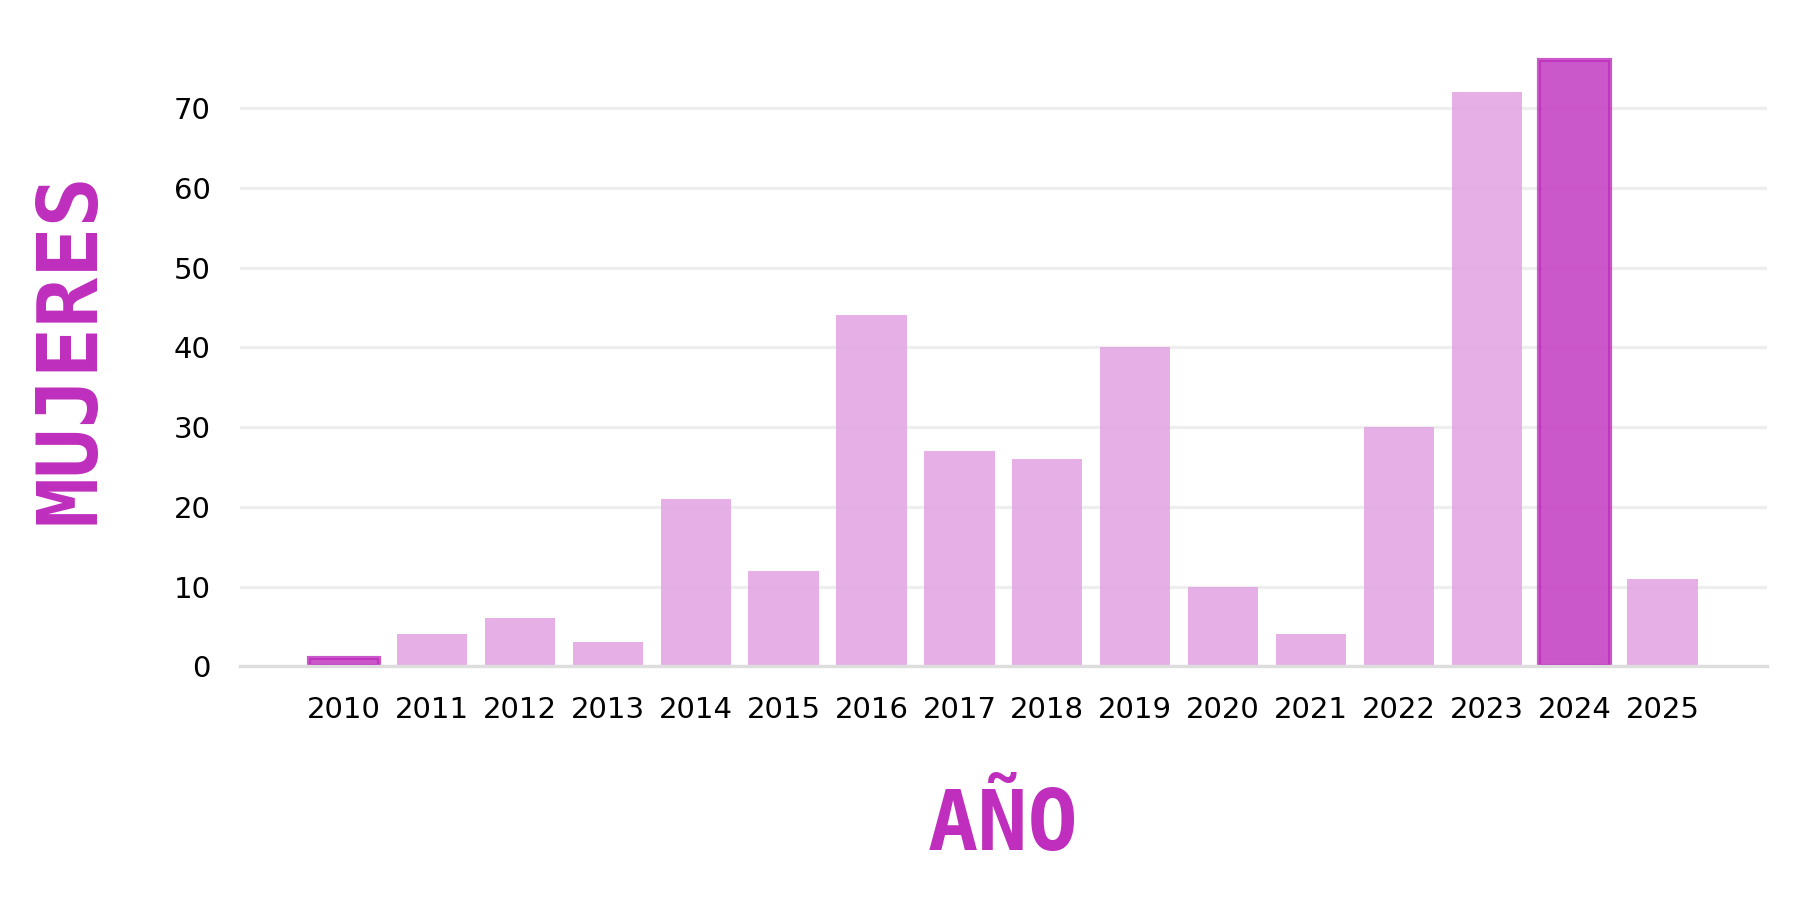

In [28]:
import matplotlib.pyplot as plt
DARK_BLUE = "#bf2ebd"
LIGHT_BLUE = "#e09de0"
data = df.set_index("year")["conteo"]

plt.rc("font", size=7)
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
bars = ax.bar(data.index, data, width=0.8, alpha=0.8, color=LIGHT_BLUE)

for bar in bars:
    if bar.get_height() == max(data):
        bar.set_color(DARK_BLUE)
    if bar.get_height() == min(data):
        bar.set_color(DARK_BLUE)

# Axis formatting
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_color("#DDDDDD")
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color="#EEEEEE")
ax.xaxis.grid(False)

# Add labels
ax.set_xlabel(
    "AÑO",
    labelpad=15,
    color="#bf2ebd",
    font={"family": "monospace", "weight": "bold", "size": 20},
)
ax.set_ylabel(
    "MUJERES",
    labelpad=15,
    color="#bf2ebd",
    font={"family": "monospace", "weight": "bold", "size": 20},
)

start, end = ax.get_ylim()
# ax.xaxis.set_ticks(np.arange(min_age, max_age + 1, 1))
# ax.yaxis.set_ticks(np.arange(start, end, 5))

fig.tight_layout()


### 12. Top mujeres 333

--


In [29]:
# df = process_report(
#     "12 - Top mujeres 333",
#     """
#         with f as (
#             select *
#             from Persons p
#             where 1=1
#             and p.gender = 'f'
#             and p.countryId = 'Colombia'
#         ), r as (
#             select
#                 c.id competitionId,
#                 r.eventId,
#                 r.personId,
#                 r.average avg
#             from Competitions c
#             join Results r on r.competitionId = c.id
#             where 1=1
#             and r.average != -1
#             and r.average != 0
#             and r.eventId = '333'
#             and r.personCountryId = 'Colombia'
#         ), data as (
#             select *,
#                 row_number() over (partition by r.eventId order by r.avg desc) rn
#             from r
#             join f on f.id = r.personId
#         )
#         select r.competitionId, r.eventId, r.personId, r.name, r.avg
#         from data r
#         where r.rn = 1
#         order by 3
#         limit 50
#     """,
# )
# df.head(10)

In [30]:
!jupyter nbconvert --no-input --to html womens_day.ipynb;

[NbConvertApp] Converting notebook womens_day.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 333865 bytes to womens_day.html
